In [16]:
import numpy as np #Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import folium
import mag
import tt
import day
Earthquacks=pd.read_csv("https://risk-engineering.org/static/data/earthquakes-2017.csv")
print(Earthquacks.info())
Earthquacks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1559 non-null   object 
 1   latitude         1559 non-null   float64
 2   longitude        1559 non-null   float64
 3   depth            1559 non-null   float64
 4   mag              1559 non-null   float64
 5   magType          1559 non-null   object 
 6   nst              2 non-null      float64
 7   gap              1547 non-null   float64
 8   dmin             1547 non-null   float64
 9   rms              1559 non-null   float64
 10  net              1559 non-null   object 
 11  id               1559 non-null   object 
 12  updated          1559 non-null   object 
 13  place            1559 non-null   object 
 14  type             1559 non-null   object 
 15  horizontalError  1549 non-null   float64
 16  depthError       1559 non-null   float64
 17  magError      

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-12-31T20:59:02.500Z,-53.0266,-118.3468,10.00,5.1,mb,NaN,37.0,30.620,0.85,...,2018-03-17T01:54:41.040Z,Southern East Pacific Rise,earthquake,13.7,1.8,0.053,117.0,reviewed,us,us
1,2017-12-31T20:27:49.390Z,-8.1161,68.0644,10.00,5.1,mww,NaN,59.0,12.965,0.72,...,2018-03-17T01:54:41.040Z,Chagos Archipelago region,earthquake,6.5,1.8,0.062,25.0,reviewed,us,us
2,2017-12-31T14:53:31.580Z,5.4949,124.9006,30.80,5.1,mww,NaN,60.0,1.703,1.01,...,2018-03-17T01:54:40.040Z,"40km S of Daliao, Philippines",earthquake,6.7,4.0,0.073,18.0,reviewed,us,us
3,2017-12-31T14:51:58.200Z,-11.8634,165.4973,9.55,5.1,mb,NaN,74.0,5.963,1.03,...,2018-03-17T01:54:40.040Z,"132km SSW of Lata, Solomon Islands",earthquake,9.1,4.1,0.059,92.0,reviewed,us,us
4,2017-12-31T03:48:57.420Z,29.6759,129.3045,162.80,5.0,mww,NaN,89.0,2.972,0.77,...,2018-03-17T01:54:40.040Z,"146km N of Naze, Japan",earthquake,7.6,4.2,0.065,23.0,reviewed,us,us
5,2017-12-30T08:20:51.530Z,-19.3429,-69.4283,103.33,5.2,mww,NaN,95.0,0.392,1.03,...,2018-03-17T01:54:39.040Z,"122km NE of Iquique, Chile",earthquake,3.7,4.2,0.051,37.0,reviewed,us,us
6,2017-12-29T23:55:55.260Z,-5.4289,150.8440,95.07,5.7,mww,NaN,15.0,1.621,0.74,...,2018-03-17T01:54:39.040Z,"78km E of Kimbe, Papua New Guinea",earthquake,7.0,3.5,0.052,36.0,reviewed,us,us
7,2017-12-29T23:00:57.990Z,-52.8545,-118.4953,10.00,5.0,mb,NaN,96.0,28.144,1.28,...,2018-03-17T01:54:38.040Z,Southern East Pacific Rise,earthquake,14.1,1.9,0.105,29.0,reviewed,us,us
8,2017-12-29T21:20:53.180Z,-53.0916,-117.4105,10.00,5.7,mww,NaN,29.0,27.246,0.64,...,2018-03-17T01:54:38.040Z,Southern East Pacific Rise,earthquake,11.4,1.7,0.071,19.0,reviewed,us,us
9,2017-12-29T21:16:05.420Z,-53.0722,-117.9645,10.00,5.0,mb,NaN,57.0,27.569,1.23,...,2018-03-17T01:54:38.040Z,Southern East Pacific Rise,earthquake,12.7,1.9,0.084,45.0,reviewed,us,us


In [3]:
Earthquacks.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1559.000000,1559.000000,1559.000000,1559.000000,2.000000,1547.000000,1547.000000,1559.000000,1549.000000,1559.000000,1488.000000,1489.000000
mean,-1.547677,33.456877,51.303619,5.319538,83.500000,61.255333,4.202072,0.896511,7.416979,3.000064,0.063617,86.129617
std,31.016151,122.192337,95.963941,0.391127,24.748737,35.142697,5.439286,0.218832,2.351519,1.740347,0.021927,108.319743
min,-64.938700,-179.935200,0.000000,5.000000,66.000000,8.000000,0.034000,0.090000,0.250000,0.200000,0.020000,5.000000
25%,-21.578500,-75.646950,10.000000,5.000000,74.750000,34.000000,1.131500,0.740000,5.800000,1.800000,0.050000,22.000000
50%,-5.544100,77.561800,13.000000,5.200000,83.500000,55.000000,2.388000,0.870000,7.300000,1.900000,0.062000,44.000000
75%,16.229300,143.003550,49.215000,5.500000,92.250000,80.500000,5.046000,1.030000,8.800000,4.200000,0.073250,102.000000
max,86.922900,179.925700,628.000000,8.200000,101.000000,230.000000,38.706000,1.630000,16.700000,12.900000,0.214000,941.000000


In [8]:
Earthquacks=pd.read_csv('https://risk-engineering.org/static/data/earthquakes-2017.csv',parse_dates=['time'],index_col='id')
print(Earthquacks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1559 entries, us1000bymc to us10007p01
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             1559 non-null   datetime64[ns, UTC]
 1   latitude         1559 non-null   float64            
 2   longitude        1559 non-null   float64            
 3   depth            1559 non-null   float64            
 4   mag              1559 non-null   float64            
 5   magType          1559 non-null   object             
 6   nst              2 non-null      float64            
 7   gap              1547 non-null   float64            
 8   dmin             1547 non-null   float64            
 9   rms              1559 non-null   float64            
 10  net              1559 non-null   object             
 11  updated          1559 non-null   object             
 12  place            1559 non-null   object             
 13  type    

In [4]:
Earthquacks.sort_values('mag',ascending=False).head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
519,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2018-09-25T05:07:35.948Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
1447,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,2017-04-19T18:30:54.040Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
721,2017-07-17T23:34:13.740Z,54.4434,168.8570,10.00,7.7,mww,NaN,13.0,3.564,0.68,...,2017-10-11T01:03:51.040Z,"202km ESE of Nikol'skoye, Russia",earthquake,7.0,1.8,0.036,73.0,reviewed,us,us
1498,2017-01-10T06:13:48.140Z,4.4782,122.6171,627.17,7.3,mww,NaN,18.0,3.813,1.05,...,2017-05-07T17:42:08.352Z,"189km SSE of Tabiauan, Philippines",earthquake,8.5,3.0,NaN,NaN,reviewed,us,us
219,2017-11-12T18:18:17.180Z,34.9109,45.9592,19.00,7.3,mww,NaN,33.0,0.284,1.29,...,2018-06-29T23:58:33.558Z,"29km S of Halabjah, Iraq",earthquake,4.9,1.7,0.044,50.0,reviewed,us,us
450,2017-09-19T18:14:38.090Z,18.5499,-98.4887,48.00,7.1,mww,NaN,23.0,0.984,1.14,...,2018-09-26T04:07:04.382Z,"1km E of Ayutla, Mexico",earthquake,4.5,1.8,0.048,41.0,reviewed,us,us
152,2017-11-19T22:43:29.250Z,-21.3246,168.6715,10.00,7.0,mww,NaN,14.0,0.617,0.65,...,2018-02-14T02:01:05.040Z,"85km ENE of Tadine, New Caledonia",earthquake,5.6,1.7,0.071,19.0,reviewed,us,us
830,2017-06-14T07:29:04.390Z,14.9091,-92.0092,93.00,6.9,mww,NaN,35.0,0.247,1.42,...,2017-09-08T08:33:56.858Z,"2km SSW of San Pablo, Guatemala",earthquake,2.8,2.2,0.026,146.0,reviewed,us,us
1062,2017-04-24T21:38:30.820Z,-33.0375,-72.0617,28.00,6.9,mww,NaN,39.0,0.356,0.73,...,2018-05-29T13:40:05.939Z,"40km W of Valparaiso, Chile",earthquake,4.9,1.8,NaN,NaN,reviewed,us,us
1039,2017-04-28T20:23:17.260Z,5.5043,125.0658,26.00,6.9,mww,NaN,14.0,1.636,0.99,...,2017-08-05T00:39:03.876Z,"31km SW of Burias, Philippines",earthquake,6.6,1.8,0.044,49.0,reviewed,us,us


In [5]:
Earthquacks['Country']=Earthquacks['place'].str.extract('(\,[a-zA-Z ]+)', expand=False).str.strip()
Earthquacks['Country']=Earthquacks['Country'].str.replace(', ','')
Earthquacks.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Country
0,2017-12-31T20:59:02.500Z,-53.0266,-118.3468,10.00,5.1,mb,NaN,37.0,30.620,0.85,...,Southern East Pacific Rise,earthquake,13.7,1.8,0.053,117.0,reviewed,us,us,NaN
1,2017-12-31T20:27:49.390Z,-8.1161,68.0644,10.00,5.1,mww,NaN,59.0,12.965,0.72,...,Chagos Archipelago region,earthquake,6.5,1.8,0.062,25.0,reviewed,us,us,NaN
2,2017-12-31T14:53:31.580Z,5.4949,124.9006,30.80,5.1,mww,NaN,60.0,1.703,1.01,...,"40km S of Daliao, Philippines",earthquake,6.7,4.0,0.073,18.0,reviewed,us,us,Philippines
3,2017-12-31T14:51:58.200Z,-11.8634,165.4973,9.55,5.1,mb,NaN,74.0,5.963,1.03,...,"132km SSW of Lata, Solomon Islands",earthquake,9.1,4.1,0.059,92.0,reviewed,us,us,Solomon Islands
4,2017-12-31T03:48:57.420Z,29.6759,129.3045,162.80,5.0,mww,NaN,89.0,2.972,0.77,...,"146km N of Naze, Japan",earthquake,7.6,4.2,0.065,23.0,reviewed,us,us,Japan


In [6]:
Earthquacks.type.unique()

array(['earthquake', 'nuclear explosion'], dtype=object)

In [7]:
country_grp=Earthquacks.groupby(['Country'])
country_high_Eq=country_grp['type'].apply(lambda x: x.str.contains('earthquake').sum())
country_high_Eq.sort_values(ascending=False).head(10)

Country
Indonesia           175
Japan                79
Papua New Guinea     77
New Caledonia        76
Mexico               68
Chile                67
Tonga                66
Alaska               63
Philippines          60
New Zealand          54
Name: type, dtype: int64

In [8]:
Earthquacks.groupby('Country')['mag'].max().sort_values(ascending=False).head(15)

Country
Mexico              8.2
Papua New Guinea    7.9
Russia              7.7
Philippines         7.3
Iraq                7.3
New Caledonia       7.0
Chile               6.9
Guatemala           6.9
Fiji                6.9
Tonga               6.8
Alaska              6.8
Vanuatu             6.8
Indonesia           6.7
New Zealand         6.6
Greece              6.6
Name: mag, dtype: float64

In [9]:
Earthquacks.groupby('Country')['mag'].max().sort_values(ascending=True).head(10)

Country
Palau           5.0
Norway          5.0
Nepal           5.0
Japan region    5.0
Malawi          5.1
Uzbekistan      5.1
Tanzania        5.1
Australia       5.1
Burma           5.1
Yemen           5.1
Name: mag, dtype: float64

In [10]:
Mag_filter=Earthquacks['mag'] >= 4.0
Filtered_Mag_dataset=Earthquacks[Mag_filter]

array([[<AxesSubplot:title={'center':'mag'}>]], dtype=object)

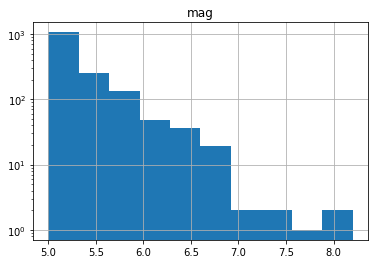

In [11]:
Filtered_Mag_dataset.hist(column='mag',log=True)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

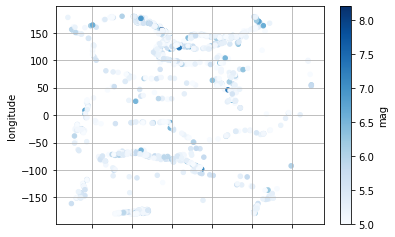

In [12]:
Filtered_Mag_dataset.plot(kind='scatter', x='latitude',y='longitude', grid=True,c='mag',colormap='Blues')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

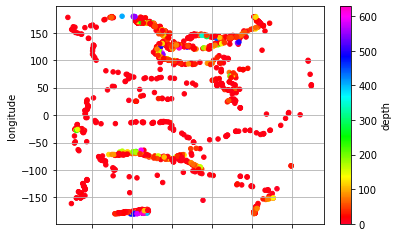

In [13]:
Filtered_Mag_dataset.plot(kind='scatter', x='latitude',y='longitude', grid=True,c='depth',colormap='gist_rainbow')

In [25]:
Earthquacks['Magnitude_Word']=''

In [22]:
# class earthquk2():
    
#     def __init__(self, data):
#       self.mag=data.mag
        

#     def magnitude_injecction(self):
#       for i in range(len(self.mag)):
#         if data.iloc[i]['mag']< 2.0:
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='Noticable'
#         elif  data.iloc[i]['mag'] < 4.0: 
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='minor'
#         elif  data.iloc[i]['mag'] < 5.0: 
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='light'
#         elif  data.iloc[i]['mag'] < 6.0: 
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='moderate'
#         elif  data.iloc[i]['mag'] < 7.0: 
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='strong'
#         elif  data.iloc[i]['mag'] < 8.0: 
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='major'
#         else:
#           data.iloc[i, data.columns.get_loc('Magnitude_Word')] ='epic'  
           
          

In [28]:
data=Earthquacks
ec=tt.earthquk2(data)
ec.magnitude_injecction()

NameError: name 'Earthquacks' is not defined

In [27]:
Earthquacks.sort_values('mag',ascending=False).head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Magnitude_Word
519,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us,epic
1447,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us,major
721,2017-07-17T23:34:13.740Z,54.4434,168.8570,10.00,7.7,mww,NaN,13.0,3.564,0.68,...,"202km ESE of Nikol'skoye, Russia",earthquake,7.0,1.8,0.036,73.0,reviewed,us,us,major
1498,2017-01-10T06:13:48.140Z,4.4782,122.6171,627.17,7.3,mww,NaN,18.0,3.813,1.05,...,"189km SSE of Tabiauan, Philippines",earthquake,8.5,3.0,NaN,NaN,reviewed,us,us,major
219,2017-11-12T18:18:17.180Z,34.9109,45.9592,19.00,7.3,mww,NaN,33.0,0.284,1.29,...,"29km S of Halabjah, Iraq",earthquake,4.9,1.7,0.044,50.0,reviewed,us,us,major
450,2017-09-19T18:14:38.090Z,18.5499,-98.4887,48.00,7.1,mww,NaN,23.0,0.984,1.14,...,"1km E of Ayutla, Mexico",earthquake,4.5,1.8,0.048,41.0,reviewed,us,us,major
152,2017-11-19T22:43:29.250Z,-21.3246,168.6715,10.00,7.0,mww,NaN,14.0,0.617,0.65,...,"85km ENE of Tadine, New Caledonia",earthquake,5.6,1.7,0.071,19.0,reviewed,us,us,major
830,2017-06-14T07:29:04.390Z,14.9091,-92.0092,93.00,6.9,mww,NaN,35.0,0.247,1.42,...,"2km SSW of San Pablo, Guatemala",earthquake,2.8,2.2,0.026,146.0,reviewed,us,us,strong
1062,2017-04-24T21:38:30.820Z,-33.0375,-72.0617,28.00,6.9,mww,NaN,39.0,0.356,0.73,...,"40km W of Valparaiso, Chile",earthquake,4.9,1.8,NaN,NaN,reviewed,us,us,strong
1039,2017-04-28T20:23:17.260Z,5.5043,125.0658,26.00,6.9,mww,NaN,14.0,1.636,0.99,...,"31km SW of Burias, Philippines",earthquake,6.6,1.8,0.044,49.0,reviewed,us,us,strong


In [29]:
# class earthquk():
#     def __init__(self, depth):
#         self.depth = depth

#     def depth_to_words(self):
#         if 0 < self.depth < 70:
#             return "shallow"
#         elif 70 < self.depth < 300:
#             return "intermediate"
#         elif 300 < self.depth < 700:
#             return "shallow"

In [20]:
earthquakes = Earthquacks.to_dict('records')
# # I'm just going to slice off the first 100
for earthquake in earthquakes[0:100]:
    e=mag.earthquk(earthquake["depth"])
    print(e.depth_to_words())

    

shallow
shallow
shallow
shallow
intermediate
intermediate
intermediate
shallow
shallow
shallow
shallow
shallow
shallow
intermediate
shallow
shallow
shallow
shallow
intermediate
shallow
intermediate
shallow
shallow
shallow
shallow
intermediate
intermediate
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
intermediate
intermediate
shallow
shallow
intermediate
shallow
shallow
shallow
shallow
shallow
shallow
intermediate
shallow
intermediate
shallow
shallow
shallow
shallow
shallow
intermediate
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
intermediate
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow
shallow


In [31]:
m = folium.Map(location=(0, 0), zoom_start=2)

# go through each quake in set, make circle, and add to map.
for i in range(len(Earthquacks)):
    folium.Circle(
        location=[Earthquacks.iloc[i]['latitude'], Earthquacks.iloc[i]['longitude']],
        radius=10,
    ).add_to(m)

# Same as before, we save it to file
m.save('earthquakes.html')

In [48]:
# class density():
#     def __init__(self, time, data):
#         self.time = time
#         self.data = data
        
#     def expdensity(self):    
#         duration = self.time.max() - self.time.min()
#         density = len(self.data) / float(duration.days)
#         return density

In [10]:
den=day.density(Earthquacks["time"], Earthquacks)
x=float(den.expdensity())
print(x)

4.282967032967033


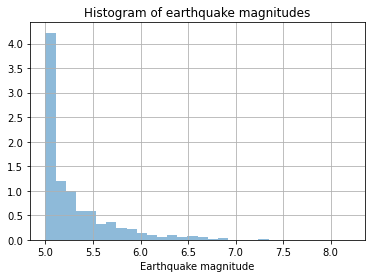

In [51]:
Earthquacks.mag.hist(density=True, alpha=0.5, bins=30)
plt.xlabel("Earthquake magnitude")
plt.title("Histogram of earthquake magnitudes");

In [ ]:
Earthquacks.time = pandas.to_datetime(Earthquacks.time)
Earthquacks.sort_values("time", inplace=True)

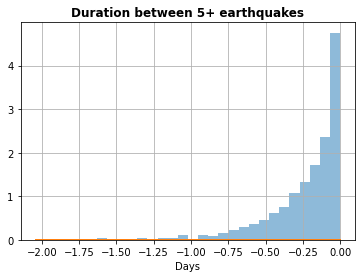

In [11]:
interarrival = Earthquacks.time.diff().dropna().apply(lambda x: x / np.timedelta64(1, "D"))
support = np.linspace(interarrival.min(), interarrival.max(), 100)
interarrival.hist(density=True, alpha=0.5, bins=30)
plt.plot(support, scipy.stats.expon(scale=1/x).pdf(support), lw=2)
plt.title("Duration between 5+ earthquakes", weight="bold")
plt.xlabel("Days");

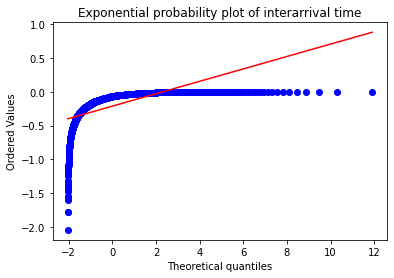

In [62]:
interarrival = Earthquacks.time.diff().dropna().apply(lambda x: x / np.timedelta64(1, "D"))
shape, loc = scipy.stats.expon.fit(interarrival)
scipy.stats.probplot(interarrival, 
                     dist="expon", sparams=(shape, loc), 
                     plot=plt.figure().add_subplot(111))
plt.title("Exponential probability plot of interarrival time");